In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
df=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [17]:
df=df[['date','meantemp']]
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


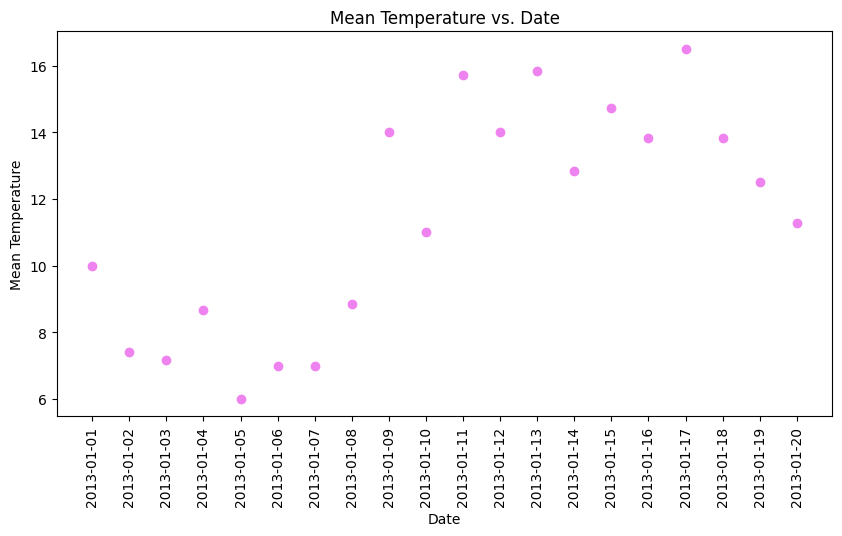

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df['date'][:20],df['meantemp'][:20],color='violet')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature vs. Date')
plt.xticks(rotation=90)
plt.show()

In [19]:
x1=df['meantemp'].ewm(alpha=0.9).mean()
x1[:5]

0    10.000000
1     7.636364
2     7.213213
3     8.521452
4     6.252123
Name: meantemp, dtype: float64

In [20]:
df['meantemp_ewm']=x1
df.head()

,date,meantemp,meantemp_ewm
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123


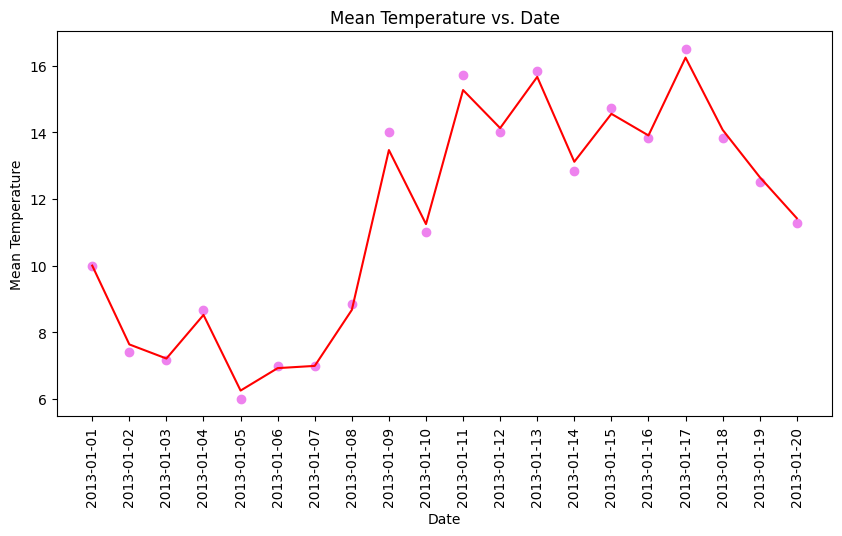

In [21]:
#previous 1 days ewma ====> (alpha=1-beta) and no.of days=1/(1-beta)
plt.figure(figsize=(10,5))
plt.scatter(df['date'][:20],df['meantemp'][:20],color='violet')
plt.plot(df['date'][:20],df['meantemp_ewm'][:20],color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature vs. Date')
plt.xticks(rotation=90)
plt.show()

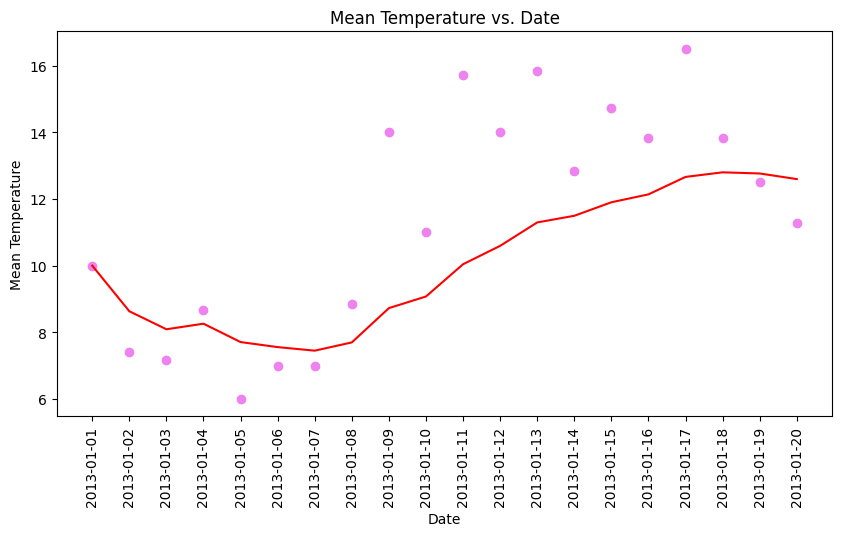

In [22]:
#previous 10 days ewma
x2=df['meantemp'].ewm(alpha=0.1).mean()
df['meantemp_ewm']=x2
plt.figure(figsize=(10,5))
plt.scatter(df['date'][:20],df['meantemp'][:20],color='violet')
plt.plot(df['date'][:20],df['meantemp_ewm'][:20],color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature vs. Date')
plt.xticks(rotation=90)
plt.show()

##  Customized Exponential Moving Weighted Average (EMWA) function

In [23]:
def calculate_ema(data, alpha):
    ema = [data[0]]
    for t in range(1, len(data)):
        ema_t = alpha * data[t] + (1 - alpha) * ema[-1]
        ema.append(ema_t)

    return ema

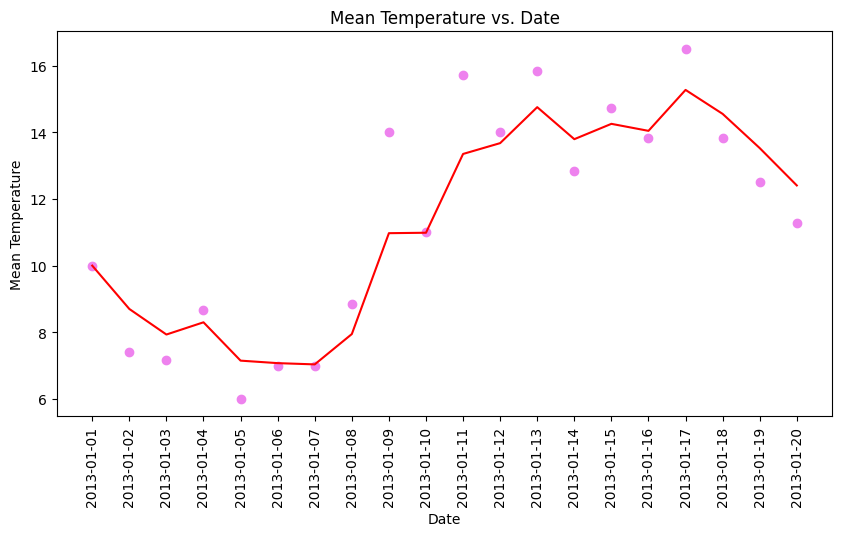

In [24]:
#previous 2 days ewma
alpha = 0.5
df['meantemp_ewm'] = calculate_ema(df['meantemp'].values, alpha)
plt.figure(figsize=(10,5))
plt.scatter(df['date'][:20],df['meantemp'][:20],color='violet')
plt.plot(df['date'][:20],df['meantemp_ewm'][:20],color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature vs. Date')
plt.xticks(rotation=90)
plt.show()